<a href="https://colab.research.google.com/github/sbh69840/Gsoc-2019/blob/master/selection_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!curl -o "ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf.gz" http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/supporting/hd_genotype_chip/ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf.gz
!curl -o "20131219.populations.tsv" http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20131219.populations.tsv
!curl -o "affy_samples.20141118.panel" http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/supporting/hd_genotype_chip/affy_samples.20141118.panel

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  746M  100  746M    0     0   479k      0  0:26:35  0:26:35 --:--:--  465k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1663  100  1663    0     0   1144      0  0:00:01  0:00:01 --:--:--  1144
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48322  100 48322    0     0  99427      0 --:--:-- --:--:-- --:--:-- 99427


In [10]:
!pip install umap-learn
!pip install scikit-learn
!pip install zarr
!pip install bcolz
!pip install scikit-allel


In [0]:
import time
start_time = time.time()
import os
try:
    os.remove("my1.log")
except:
    pass
import logging
logging.basicConfig(filename="my1.log",filemode="w+",level=logging.INFO,\
format='%(asctime)s - %(levelname)-10s - %(message)s')
import platform
u = platform.uname()

logging.info("The program started at {0}".format(time.ctime(int(start_time))))
logging.info(u)

In [0]:
#set a random seed.
import sys
logging.info("Packages used in python {0} are :".format(sys.version.split(" ")[0]))
import umap
logging.info("    umap, {0}".format(umap.__version__))
from sklearn.decomposition import PCA
import sklearn
logging.info("    sklearn.decomposition.PCA, {0}".format(sklearn.__version__))
import numpy as np
logging.info("    numpy, {0}".format(np.__version__))
import zarr
logging.info("    zarr, {0}".format(zarr.__version__))
import random
logging.info("    random, {0}".format("current python"))
random.seed(345)
logging.info("    time, {0}".format("current python"))
logging.info("    os, {0}".format("current python"))
np.random.seed(345)
import h5py
logging.info("    h5py, {0}".format(h5py.__version__))
import matplotlib.pyplot as plt
import matplotlib
logging.info("    matplotlib.pyplot.plt, {0}".format(matplotlib.__version__))
%matplotlib inline
import seaborn as sns
logging.info("    seaborn, {0}".format(sns.__version__))
sns.set_style('white')
sns.set_style('ticks')
sns.set()
import bcolz
logging.info("    bcolz, {0}".format(bcolz.__version__))
import pandas
logging.info("    pandas, {0}".format(pandas.__version__))
import allel
logging.info("    scikit-allel, {0}".format(allel.__version__))
logging.info("    inspect, {0}".format("current python"))
logging.info("Seed used to generate the coordinates are :")
logging.info("    random.seed(345)")
logging.info("    np.random.seed(345)")
import inspect



In [13]:
#Using zarr for faster load time of given data.
logging.info("Converting the vcf.gz file to zarr file:")
zarr_path = "gene1.zarr"
load_time = 0
convert_time = 0
pca_time = 0
umap_time = 0
if os.path.isdir("gene1.zarr"):
    load_time = time.time()
    data = zarr.open(zarr_path)
    load_time = time.time()-load_time
    logging.info("Time taken to load zarr data : {0} sec".format(load_time))
    print("Output code: {0}".format(1))
    data.tree(expand=True)
    logging.info("    Data converted and output displayed under output code 1")
    
else:
    logging.error("    zarr folder doesn't exist, creating one.")
    convert_time = time.time()
    allel.vcf_to_zarr("ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf.gz",zarr_path,fields="*"\
                      ,log=sys.stdout,overwrite=True)
    convert_time = time.time()-convert_time
    logging.info("Time taken to convert data : {0} sec".format(convert_time))
    load_time = time.time()
    data = zarr.open(zarr_path)
    load_time = time.time()-load_time
    logging.info("Time taken to load zarr data : {0} sec".format(load_time))
    print("Output code: {0}".format(1))
    data.tree(expand=True)
    logging.info("    Data converted and output displayed under output code 1")

[vcf_to_zarr] 65536 rows in 19.87s; chunk in 19.87s (3298 rows/s); 1 :233857117
[vcf_to_zarr] 131072 rows in 41.05s; chunk in 21.19s (3093 rows/s); 2 :198362018
[vcf_to_zarr] 196608 rows in 62.22s; chunk in 21.16s (3096 rows/s); 3 :166304564
[vcf_to_zarr] 262144 rows in 83.40s; chunk in 21.19s (3093 rows/s); 5 :1639103
[vcf_to_zarr] 327680 rows in 104.20s; chunk in 20.80s (3151 rows/s); 6 :21908093
[vcf_to_zarr] 393216 rows in 125.09s; chunk in 20.89s (3137 rows/s); 7 :50536087
[vcf_to_zarr] 458752 rows in 145.96s; chunk in 20.87s (3140 rows/s); 8 :115739018
[vcf_to_zarr] 524288 rows in 166.86s; chunk in 20.90s (3136 rows/s); 10 :29361379
[vcf_to_zarr] 589824 rows in 187.76s; chunk in 20.90s (3134 rows/s); 11 :97383737
[vcf_to_zarr] 655360 rows in 208.57s; chunk in 20.81s (3148 rows/s); 13 :40629385
[vcf_to_zarr] 720896 rows in 229.51s; chunk in 20.93s (3130 rows/s); 15 :60551926
[vcf_to_zarr] 786432 rows in 250.40s; chunk in 20.89s (3136 rows/s); 18 :7607939
[vcf_to_zarr] 851968 rows 

In [14]:
#display the data from panel file
logging.info("Displaying top 5 rows of affy_samples.20141118.panel file")
df1 = pandas.read_csv('affy_samples.20141118.panel', delimiter='\t')
print("Output code: {0}".format(2))
logging.info("    Under the output code 2")
df1.head()


Output code: 2


,sample,pop,in phase 3
0,HG00096,GBR,1
1,HG00097,GBR,1
2,HG00098,GBR,0
3,HG00099,GBR,1
4,HG00100,GBR,1


In [0]:
logging.info("Converting the calldata/GT to allel.GenotypeChunkedArray(data)...")
gt = allel.GenotypeChunkedArray(data["calldata/GT"])

In [0]:
logging.info("Converting genotype data to 2-dim matrix using allel.GenotypeChunkedArray.to_n_alt()...")
gn = gt.to_n_alt()

In [0]:
#finding co-related data points by looking at dark spots in the graph. source: http://alimanfoo.github.io/2015/09/28/fast-pca.html

def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = allel.plot_pairwise_ld(m)
    ax.set_title(title)


Output code: 3


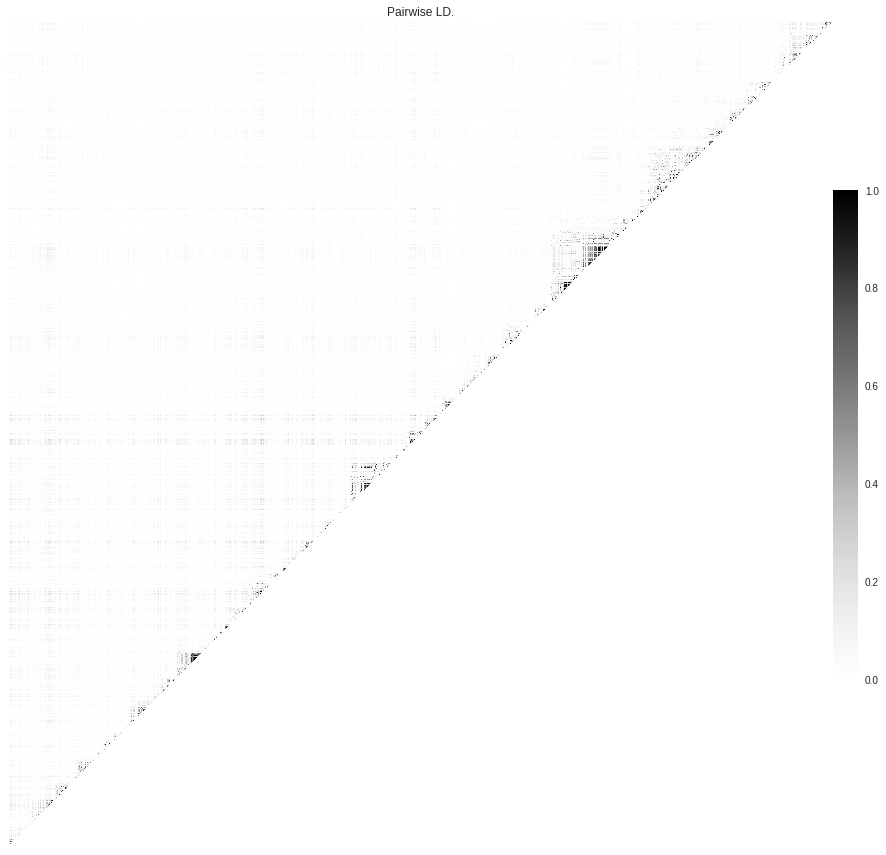

In [18]:
plot_ld(gn[:1000], 'Pairwise LD.')
logging.info("Plotting pairwise LD using plot_ld({0}) under output code 3".format(inspect.signature(plot_ld)))
print("Output code: {0}".format(3))
plt.show()

In [19]:
#source : http://alimanfoo.github.io/2015/09/28/fast-pca.html
logging.info("random downsampling the genotype data...")
n = 100000  # number of SNPs to choose randomly
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
gnr

<ChunkedArrayWrapper shape=(100000, 3450) dtype=int8 chunks=(391, 3450)
   nbytes=329.0M cbytes=152.2M cratio=2.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

Output code: 4


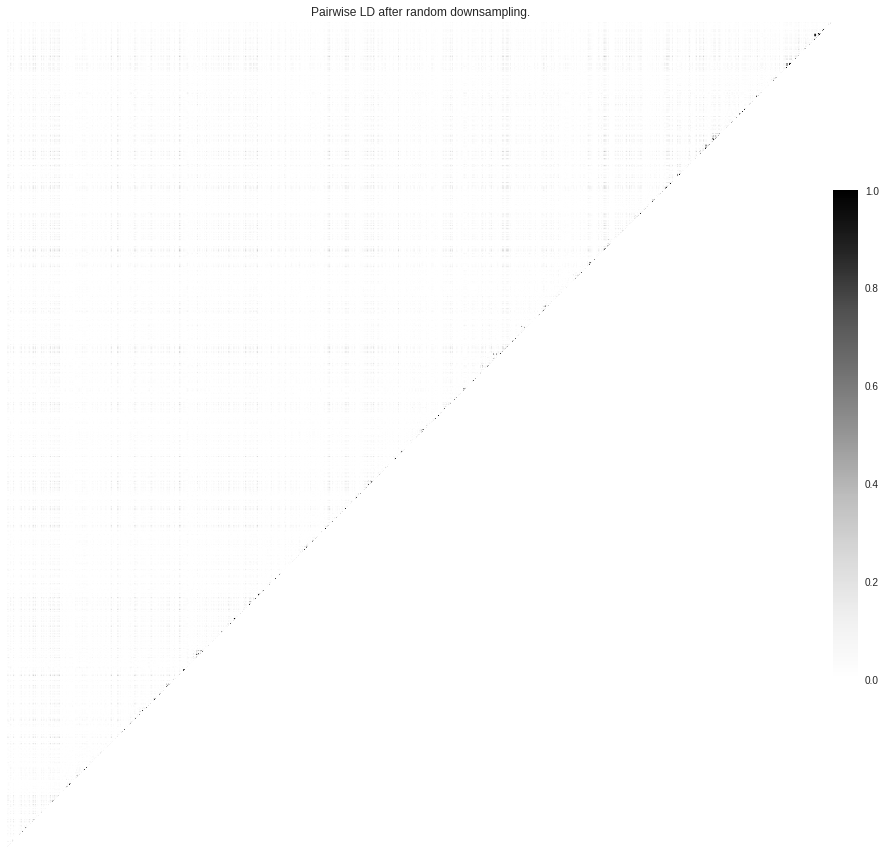

In [20]:
plot_ld(gnr[:1000], 'Pairwise LD after random downsampling.')
logging.info("Plotting pairwise LD after rnd downsampling using plot_ld({0}) under output code 4".format(inspect.signature(plot_ld)))
print("Output code: {0}".format(4))
plt.show()

In [0]:
#source : http://alimanfoo.github.io/2015/09/28/fast-pca.html
def ld_prune(gn, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
    return gn

In [22]:
print("Output code: {0}".format(5))
gnu = ld_prune(gnr, size=100, step=50, threshold=.1, n_iter=2)
logging.info("removing unwanted data using ld_prune({0}) under output code 5".format(inspect.signature(ld_prune)))


Output code: 5
iteration 1 retaining 54791 removing 45209 variants
iteration 2 retaining 54309 removing 482 variants


Output code: 6


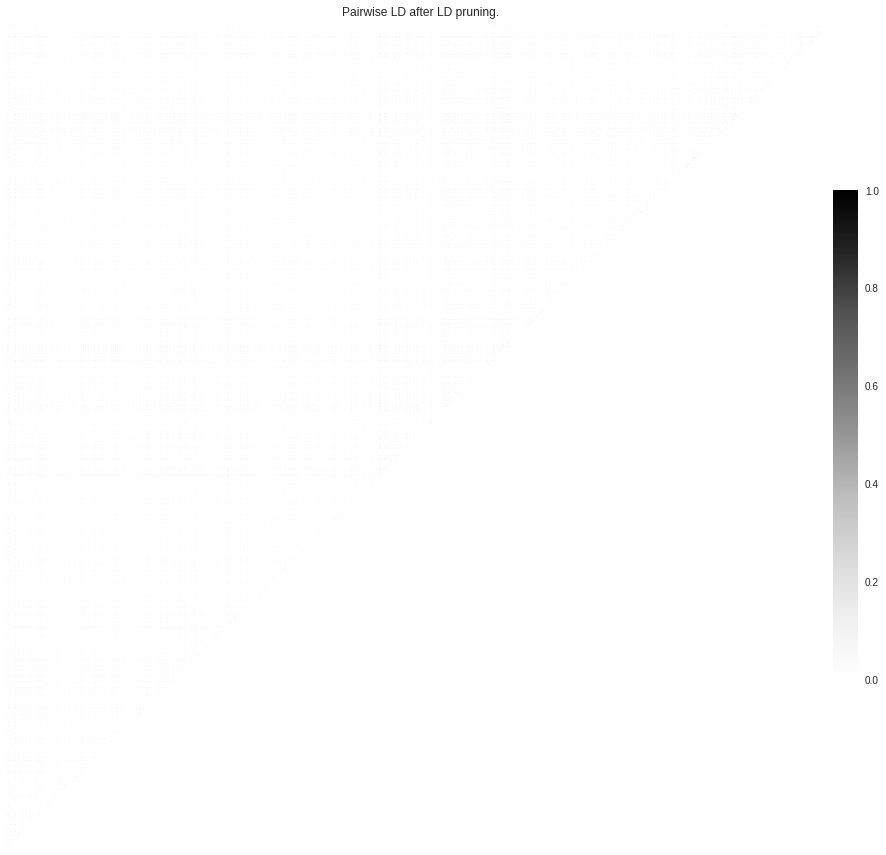

In [23]:
plot_ld(gnu[:1000], 'Pairwise LD after LD pruning.')
logging.info("Plotting pairwise LD after pruning using plot_ld({0}) under output code 6".format(inspect.signature(plot_ld)))
print("Output code: {0}".format(6))
plt.show()

In [0]:
gnu = gnu[:]
gnu = gnu.T

In [0]:
logging.info("calling sklearn.decomposition.PCA(n_components=2)...")
pca_time = time.time()
p = PCA(n_components=2)

logging.info("    calling fit_transform on the PCA output...")
projected = p.fit_transform(gnu)
pca_time = time.time()-pca_time
np.savez_compressed("pca.npz",pca=projected)

In [0]:
pop = df1["pop"].values

In [0]:
pop_color = {
    'GBR':'#193943',
    'FIN':'#547634',
    'CHS':'#8347CC',
    'PUR':'#F75F18',
    'CDX':'#27F0DB',
    'CLM':'#CE5089',
    'IBS':'#3DDB41',
    'PEL':'#FD4341',
    'PJL':'#048539',
    'KHV':'#E61E6E',
    'ACB':'#93DE35',
    'GWD':'#873627',
    'ESN':'#715C59',
    'BEB':'#D5E6A1',
    'MSL':'#09717E',
    'STU':'#F01DF5',
    'ITU':'#37C6DF',
    'CEU':'#E51316',
    'YRI':'#CFBB56',
    'CHB':'#C5F466',
    'JPT':'#267437',
    'LWK':'#6CCE00',
    'ASW':'#597405',
    'MXL':'#0612D0',
    'TSI':'#6BC954',
    'GIH':'#7CD3AE'

}

Output code: 7


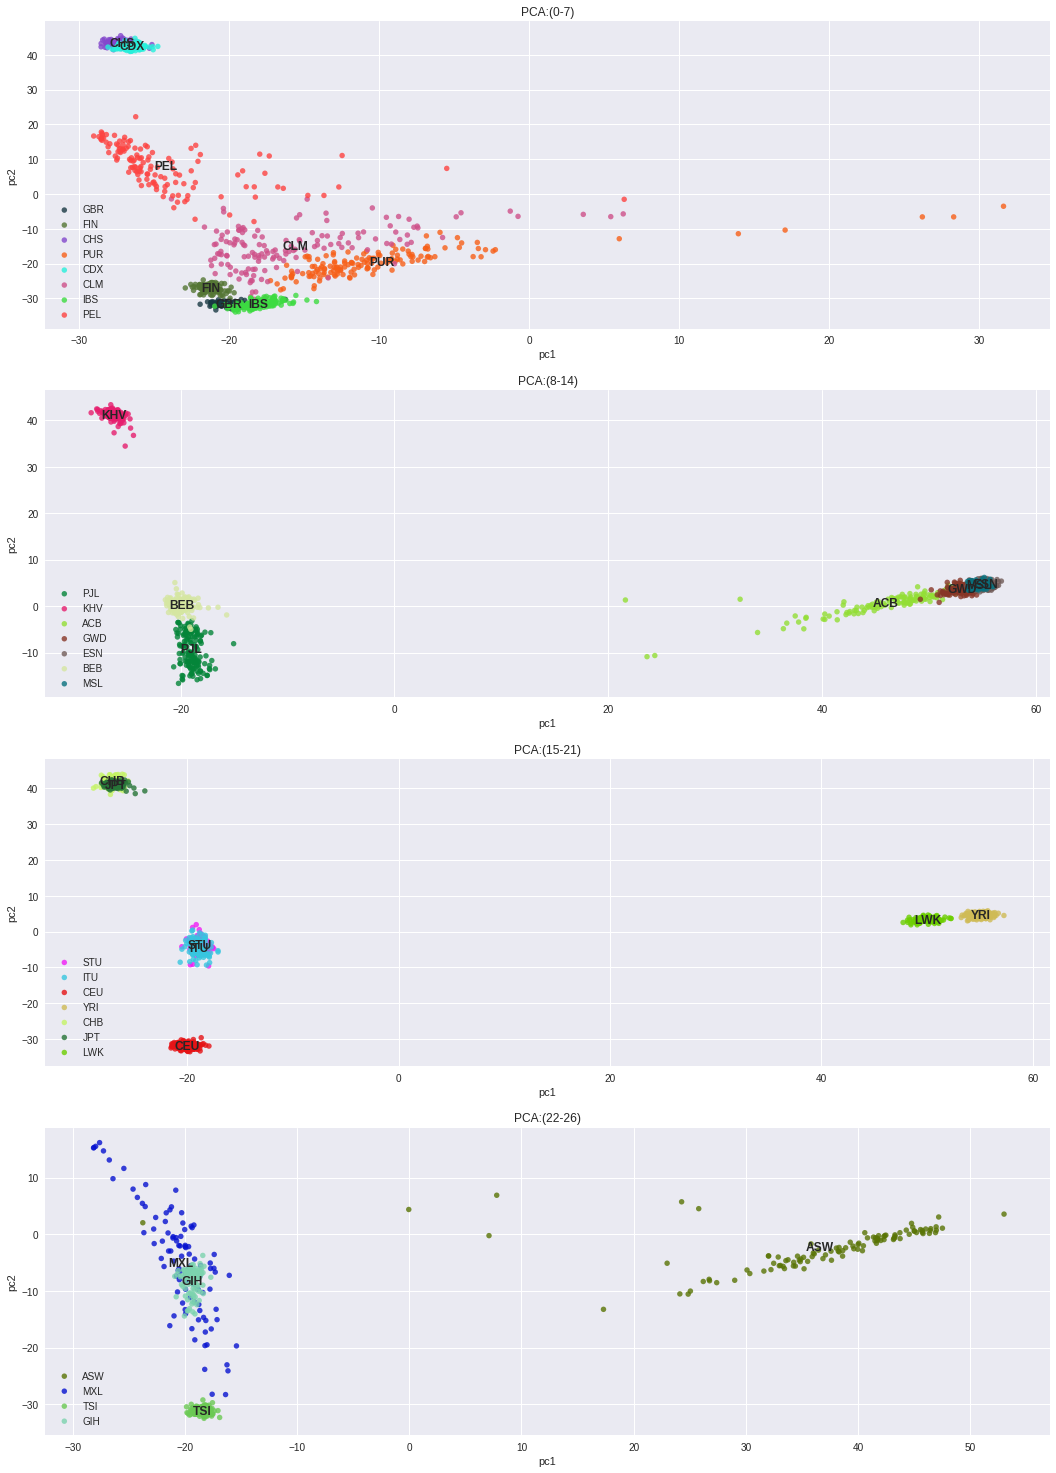

In [28]:
#plotting 7 different population code in each graph.
logging.info("Plotting PCA on a set of population groups under output code 7...")
print("Output code: {0}".format(7))
uniq_pop = df1["pop"].unique()
fig,ax=plt.subplots(4,1,figsize=(18,26))
for c in range(26):
    if c<=7:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(projected,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[0].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[0].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 )
        ax[0].set_title('PCA:(0-7)')
        ax[0].set_xlabel('pc1')
        ax[0].set_ylabel('pc2')
        ax[0].legend(loc=3)
for c in range(26):
    if c>7and c<=14:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(projected,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[1].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[1].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[1].set_title('PCA:(8-14)')
        ax[1].set_xlabel('pc1')
        ax[1].set_ylabel('pc2')
        ax[1].legend(loc=3)
for c in range(26):
    if c>14and c<=21:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(projected,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[2].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[2].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[2].set_title('PCA:(15-21)')
        ax[2].set_xlabel('pc1')
        ax[2].set_ylabel('pc2')
        ax[2].legend(loc=3)
for c in range(26):
    if c>21:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(projected,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[3].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[3].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[3].set_title('PCA:(22-26)')
        ax[3].set_xlabel('pc1')
        ax[3].set_ylabel('pc2')
        ax[3].legend(loc=3)
plt.show()

Output code: 8


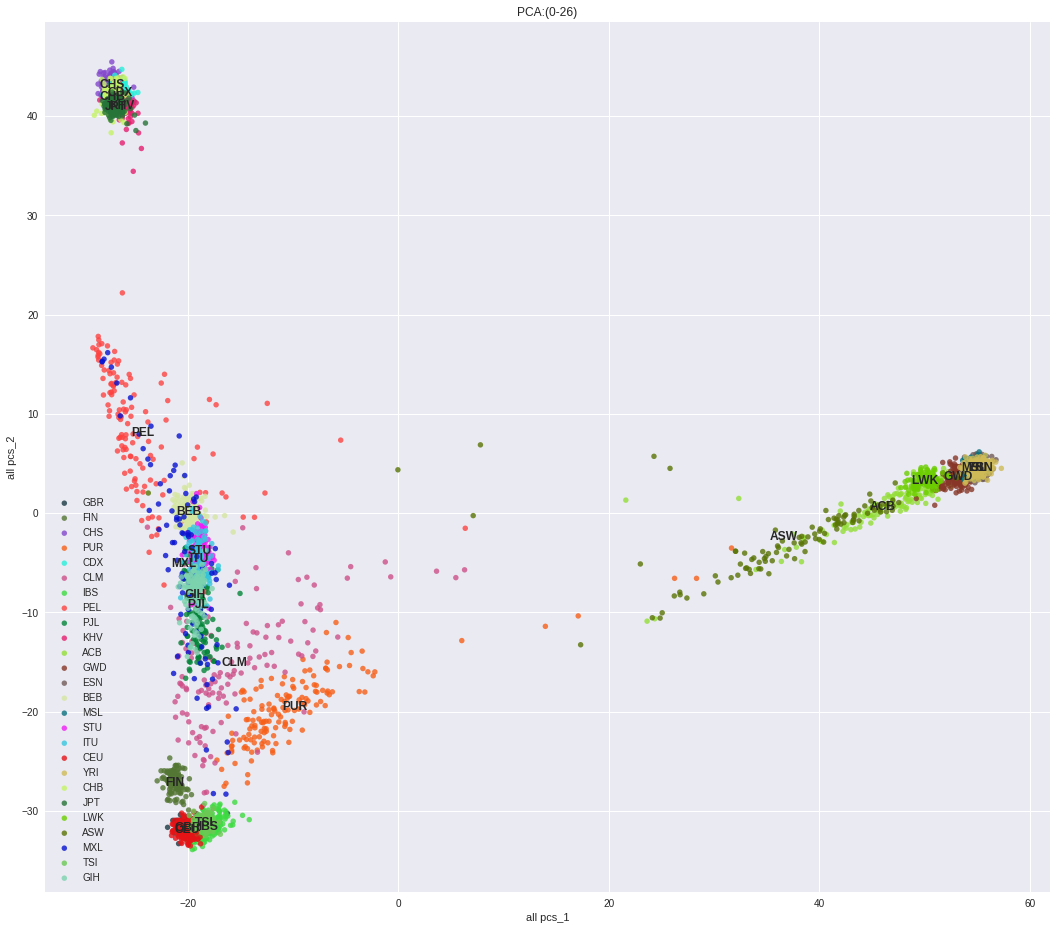

In [29]:
#plotting all the population code in one graph.
logging.info("Plotting PCA on all population groups under output code 8...")
print("Output code: {0}".format(8))
fig,ax=plt.subplots(1,1,figsize=(18,16))
for c in range(26):
    x,y=[],[]
    for i,(a,b) in enumerate(zip(projected,pop)):
        if b==uniq_pop[c]:
            x.append(a[0])
            y.append(a[1])
    color = pop_color[uniq_pop[c]]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
    ax.annotate(uniq_pop[c], 
             (sum(x)/len(x),sum(y)/len(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=12, weight='bold',
             ) 
    ax.set_title('PCA:(0-26)')
    ax.set_xlabel('all pcs_1')
    ax.set_ylabel('all pcs_2')
    ax.legend(loc=3)
plt.show()

In [30]:
#umap begins
logging.info("Calling umap.UMAP(n_neighbors=30,min_dist=0.8)")
umap_time = time.time()
reducer = umap.UMAP(n_neighbors=30, min_dist=0.8)
new_gnu = gnu[:,:]
logging.info("calling fit_transform(data) on output of UMAP...")
embed = reducer.fit_transform(new_gnu)
umap_time = time.time()-umap_time
np.savez_compressed("umap.npz",umap_=embed)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Output code: 9


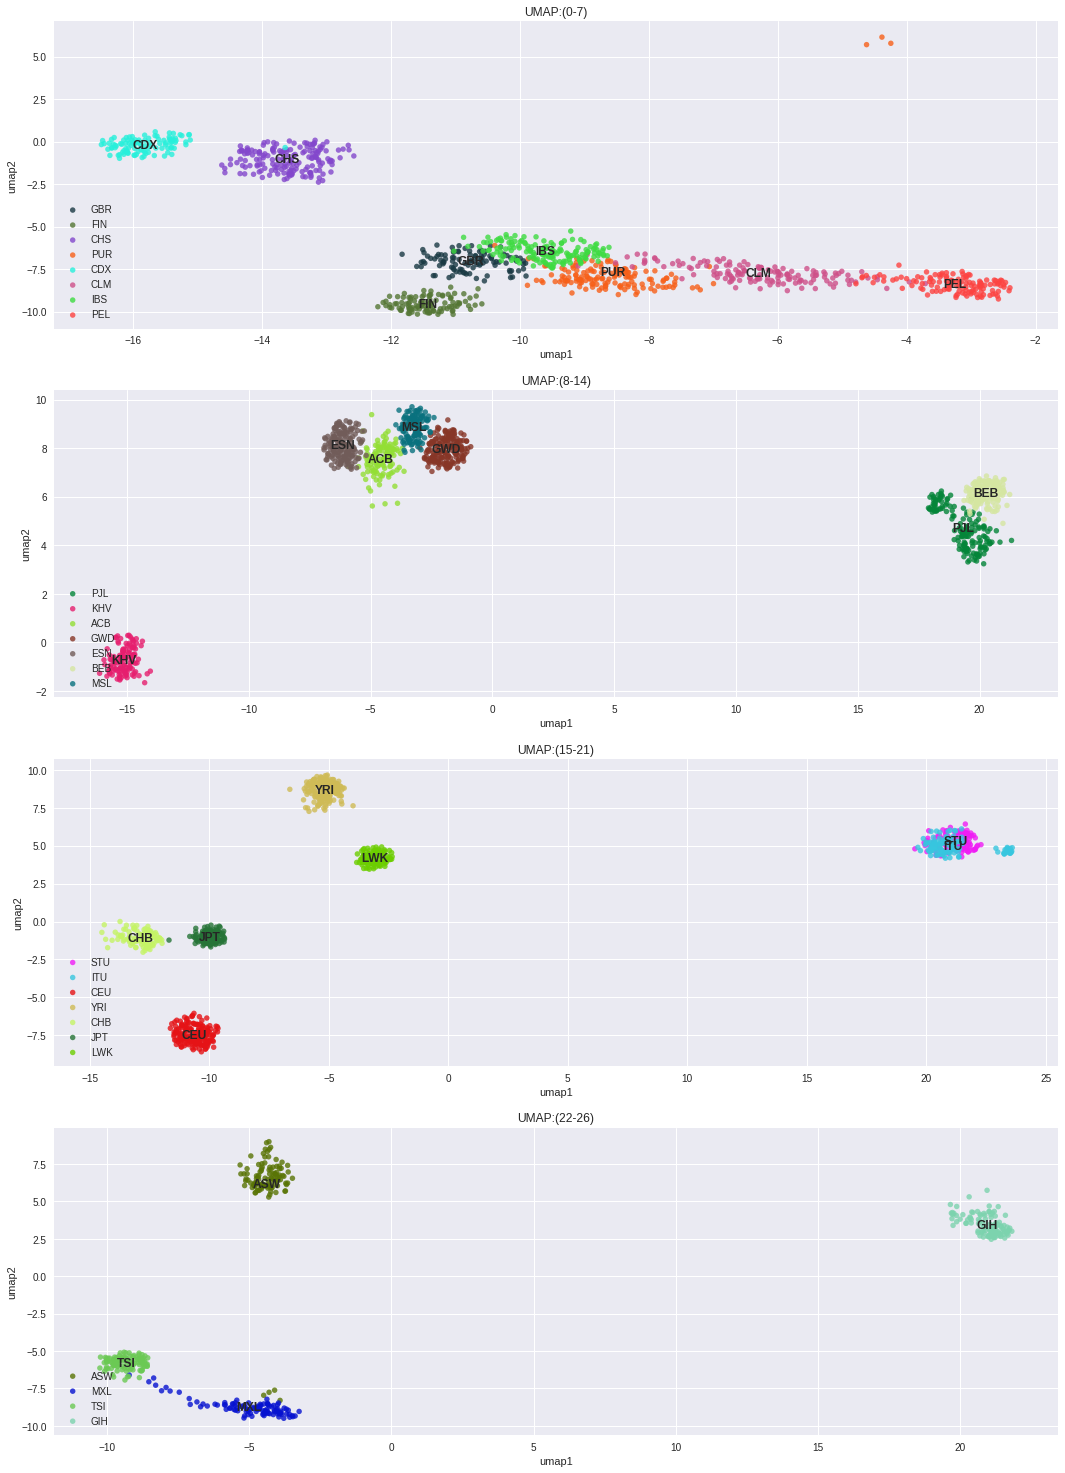

In [31]:
logging.info("Plotting UMAP on a set of population groups under output code 9...")
print("Output code: {0}".format(9))
fig,ax=plt.subplots(4,1,figsize=(18,26))
for c in range(26):
    if c<=7:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(embed,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[0].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[0].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 )
        ax[0].set_title('UMAP:(0-7)')
        ax[0].set_xlabel('umap1')
        ax[0].set_ylabel('umap2')
        ax[0].legend(loc=3)
for c in range(26):
    if c>7and c<=14:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(embed,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[1].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[1].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[1].set_title('UMAP:(8-14)')
        ax[1].set_xlabel('umap1')
        ax[1].set_ylabel('umap2')
        ax[1].legend(loc=3)
for c in range(26):
    if c>14and c<=21:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(embed,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[2].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[2].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[2].set_title('UMAP:(15-21)')
        ax[2].set_xlabel('umap1')
        ax[2].set_ylabel('umap2')
        ax[2].legend(loc=3)
for c in range(26):
    if c>21:
        x,y=[],[]
        for i,(a,b) in enumerate(zip(embed,pop)):
            if b==uniq_pop[c]:
                x.append(a[0])
                y.append(a[1])
        color = pop_color[uniq_pop[c]]
        ax[3].scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
        ax[3].annotate(uniq_pop[c], 
                 (sum(x)/len(x),sum(y)/len(y)),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 ) 
        ax[3].set_title('UMAP:(22-26)')
        ax[3].set_xlabel('umap1')
        ax[3].set_ylabel('umap2')
        ax[3].legend(loc=3)

plt.show()

Output code: 10


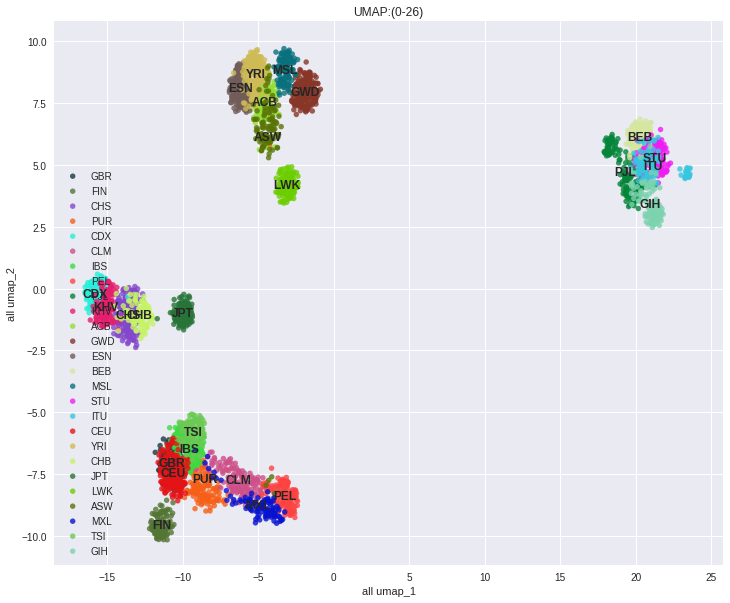

In [32]:
logging.info("Plotting PCA on all population groups under output code 10...")
print("Output code: {0}".format(10))
fig,ax=plt.subplots(1,1,figsize=(12,10))
for c in range(26):
    x,y=[],[]
    for i,(a,b) in enumerate(zip(embed,pop)):
        if b==uniq_pop[c]:
            x.append(a[0])
            y.append(a[1])
    color = pop_color[uniq_pop[c]]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=uniq_pop[c])
    ax.annotate(uniq_pop[c], 
             (sum(x)/len(x),sum(y)/len(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=12, weight='bold',
             ) 
    ax.set_title('UMAP:(0-26)')
    ax.set_xlabel('all umap_1')
    ax.set_ylabel('all umap_2')
    ax.legend(loc=3)
plt.show()

In [0]:
start_time = time.time()-start_time
logging.info("    data conversion time: {0} sec ".format(convert_time))
logging.info("    data load time: {0} sec".format(load_time))
logging.info("    PCA time: {0} sec".format(pca_time))
logging.info("    umap time: {0} sec".format(load_time))
logging.info("    total program time: {0} sec".format(start_time))